In [27]:
from thermostability.autoencoder import RepresentationAutoEncoder, Decoder, Encoder
import torch
from PIL import Image
from torchvision import transforms
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

image = Image.open("black_dock.png").convert("RGB")
image2 = Image.open("wow.jpg").convert("RGB")

normalize = transforms.Normalize(mean=3, std=153)
per_residue_input_size=1024
num_residues=700
transform = transforms.Compose( [transforms.Resize((num_residues, per_residue_input_size)), transforms.ToTensor(), transforms.Grayscale()])
# input = torch.tensor(torch.stack([transform(image), transform(image2)])).to("cuda:0")
s_s_0 = torch.load("data/s_s/0.pt")
s_s_1 = torch.load("data/s_s/1.pt")

input = torch.tensor(torch.stack([normalize(s_s_0), normalize(s_s_1)])).to("cuda:0")

print(input.size())
representation_size = 1024
per_residue_output_size = 64



ValueError: Expected tensor to be a tensor image of size (..., C, H, W). Got tensor.size() = torch.Size([152, 1024])

In [ ]:
autoencoder = RepresentationAutoEncoder(
    per_residue_input_size=per_residue_input_size, 
    per_residue_output_size=per_residue_output_size, 
    num_residues=num_residues, 
    representation_size=representation_size, 
    decoder_layer_sizes=[1024, 2048]).to("cuda:0")
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

losses = []

In [ ]:
from matplotlib.pyplot import plot 
# from thermostability.thermo_pregenerated_dataset import ThermostabilityPregeneratedDataset,  zero_padding700_collate
# from torch.utils.data import DataLoader

inputBatches = [torch.stack([input[0]]), torch.stack([input[1]])]

# ds = ThermostabilityPregeneratedDataset(representation_key="s_s")
# loader = DataLoader(
    # ds,
    # batch_size=4,
    # shuffle=True,
    # num_workers=4,
    # collate_fn=zero_padding700_collate,
# )
# 
# epochs = 10
# for e in range(epochs):
    # epoch_loss=0
    # for idx, (inputs, labels) in enumerate(loader):
        # optimizer.zero_grad()
        # decoded = autoencoder(inputs)
        # loss = loss_fn(decoded, inputs)
        # loss.backward()
        # optimizer.step()
        # losses.append(loss.item())
        # epoch_loss+=loss.item()/len(loader)
    # print(f"Loss in epoch {e}: {epoch_loss}")

losses = []
for i in range(10000):
    optimizer.zero_grad()
    decoded = autoencoder(inputBatches[i%2])
    loss = loss_fn(decoded, inputBatches[i%2])
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plot(range(len(losses)),losses)

ModuleNotFoundError: No module named 'esm'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plotImg(a: torch.Tensor, log_norm=False):
    print(a.size())
    plt.imshow(a.numpy(force=True),norm=colors.LogNorm() if log_norm else None)
    plt.colorbar()
    plt.show()

def plotDiff(a: torch.Tensor, b: torch.Tensor, log_norm):
    plotImg(torch.subtract(a,b).abs(), log_norm)

torch.Size([152, 1024])


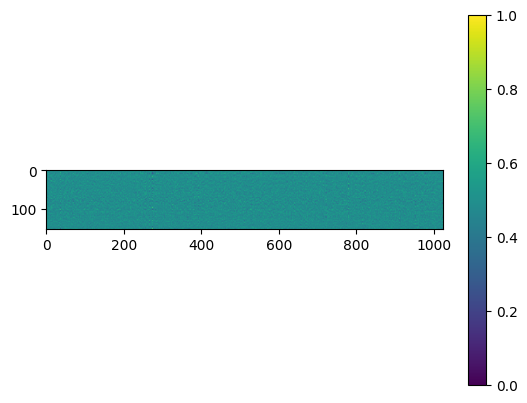

In [ ]:

from torch.distributions.normal import Normal
normalize = transforms.Normalize(mean=3, std=153)


normal_dist = Normal(0, 1)
def plotUniformed(s_s_sample: torch.Tensor):
    normalized = normalize(torch.stack([s_s_sample]))[0]
    uniformed = normal_dist.cdf(normalized)
    plotImg(uniformed)
#plotDiff(s_s_0, s_s_1, True)
plotUniformed(torch.subtract(s_s_0, s_s_1))

#plotImg(autoencoder(torch.stack([torch.rand_like(input[0])]))[0])
#plotImg(input[1].transpose(0,1).squeeze())
#input[1].size()


torch.Size([256, 256])


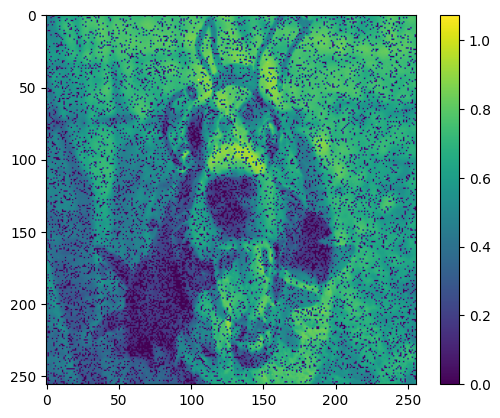

In [ ]:
plotImg(autoencoder(torch.stack([input[1]]))[0])

In [ ]:
plotDiff(s_s_0, s_s_1, True)

In [ ]:
plotDiff(input[1],autoencoder(input)[1])